In [1]:
import re
import math

import nltk
from pymystem3 import Mystem

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20})

In [2]:
def read_text(fname):
    _text = ''
    with open(fname, 'r', encoding="utf-8") as fin:
        _text = fin.read()
    return _text

def get_stopwords():
    fname = 'stopwords/final.txt'
    with open(fname, 'r', encoding="utf-8") as fin:
        _text = fin.read()
        _stopwords = _text.split('\n')
        _stopwords = [_s for _s in _stopwords if not _s.startswith('#')]
    return _stopwords

In [3]:
m = Mystem(end_of_sentence=True)
lit = 'alisa_ch02.txt'
tech = 'mediatext.txt'

In [4]:
text_lit = read_text(lit)
text_tech = read_text(tech)

In [5]:
def get_sentences_data(tokens):
    sentences = []
    sentence = []
    for t in tokens:
        if t['text'] == '\s':
            sentences.append(sentence)
            sentence = []
        if 'analysis' in t and t['analysis']:
            sentence.append(t)
    return sentences

def get_avg_sentences_len(sentences):
    return math.floor(sum(len(s) for s in sentences) / len(sentences))

def get_morph_tokens(tokens, without_stopwords=False):
    if without_stopwords:
        _stopwords = get_stopwords()
        return [t for t in tokens 
            if 'analysis' in t and t['analysis'] and t['text'].lower() not in _stopwords]
    return [t for t in tokens if 'analysis' in t and t['analysis']]

def get_unique_words(tokens):
    return set(t['text'].lower() for t in tokens)

def words_analysis(tokens, without_stopwords=False):
    sentences = get_sentences_data(tokens)
    avg_sentences = get_avg_sentences_len(sentences)
    _tokens = get_morph_tokens(tokens, without_stopwords)
    unique_words = get_unique_words(_tokens)
    print(
        f"Общее число словоформ: {len(_tokens)}\n"
        f"Число различных словоформ: {len(unique_words)}\n"
        f"Разнообразие словоформ текста: {len(unique_words) / len(_tokens):.4f}\n"
        f"Количетво предложений: {len(sentences)}\n"
        f"Максимальная длина предложений: {max(len(t) for t in sentences)}\n"
        f"Минимальная длина предложений: {min(len(t) for t in sentences)}\n"
        f"Средняя длина предложения: {avg_sentences}\n"
    )

def plot_most_freq_words(tokens, without_stopwords=False):
    _tokens = get_morph_tokens(tokens, without_stopwords)
    _words = [t['text'].lower() for t in _tokens]
    _fdist = nltk.FreqDist(_words)
    _ = _fdist.plot(20)

In [6]:
# анализ литературного текста
tokens_lit = m.analyze(text_lit)

In [7]:
# анализ технического текста
tokens_tech = m.analyze(text_tech)

In [8]:
print('Данные по литературному тексту\n')
words_analysis(tokens_lit)

Данные по литературному тексту

Общее число словоформ: 1588
Число различных словоформ: 801
Разнообразие словоформ текста: 0.5044
Количетво предложений: 108
Максимальная длина предложений: 93
Минимальная длина предложений: 2
Средняя длина предложения: 14



In [9]:
print('Данные по научному тексту\n')
words_analysis(tokens_tech)

Данные по научному тексту

Общее число словоформ: 1901
Число различных словоформ: 1004
Разнообразие словоформ текста: 0.5281
Количетво предложений: 47
Максимальная длина предложений: 185
Минимальная длина предложений: 10
Средняя длина предложения: 39



In [10]:
print('Данные по литературному тексту без стоп-слов\n')
words_analysis(tokens_lit, without_stopwords=True)

Данные по литературному тексту без стоп-слов

Общее число словоформ: 753
Число различных словоформ: 595
Разнообразие словоформ текста: 0.7902
Количетво предложений: 108
Максимальная длина предложений: 93
Минимальная длина предложений: 2
Средняя длина предложения: 14



In [11]:
print('Данные по научному тексту без стоп-слов\n')
words_analysis(tokens_tech, without_stopwords=True)

Данные по научному тексту без стоп-слов

Общее число словоформ: 1323
Число различных словоформ: 891
Разнообразие словоформ текста: 0.6735
Количетво предложений: 47
Максимальная длина предложений: 185
Минимальная длина предложений: 10
Средняя длина предложения: 39



In [12]:
m2 = Mystem(disambiguation=False, weight=True, end_of_sentence=True)

In [13]:
tokens_lit2 = m2.analyze(text_lit)

In [14]:
tokens_tech2 = m2.analyze(text_tech)

In [15]:
def get_ambig_tokens(tokens, without_stopwords=False):
    if without_stopwords:
        _stopwords = get_stopwords()
        return [t for t in tokens 
                if 'analysis' in t and len(t['analysis']) > 1 and t['text'].lower() not in _stopwords]
    return [t for t in tokens if 'analysis' in t and len(t['analysis']) > 1]

def ambig_word_analysis(tokens, without_stopwords=False):
    ambig_tokens = get_ambig_tokens(tokens, without_stopwords)
    ambig_words = [t['text'].lower() for t in ambig_tokens]
    unique_ambig_words = set(t['text'].lower() for t in ambig_tokens)
    _tokens = get_morph_tokens(tokens, without_stopwords)

    print(
        f"Количество омонимичных слов: {len(ambig_tokens)}\n"
        f"Абсолютная частота омонимичных слов: {len(ambig_tokens) / len(_tokens):.4f}\n"
        f"Разнообразие омонимичных слов: {len(unique_ambig_words) / len(ambig_words):.4f}"
    )

In [16]:
print('Данные по омонимичным словоформам литературного текста\n')
ambig_word_analysis(tokens_lit2)

Данные по омонимичным словоформам литературного текста

Количество омонимичных слов: 725
Абсолютная частота омонимичных слов: 0.4565
Разнообразие омонимичных слов: 0.3766


In [17]:
print('Данные по омонимичным словоформам литературного текста без стоп-слов\n')
ambig_word_analysis(tokens_lit2, without_stopwords=True)

Данные по омонимичным словоформам литературного текста без стоп-слов

Количество омонимичных слов: 194
Абсолютная частота омонимичных слов: 0.2576
Разнообразие омонимичных слов: 0.8247


In [18]:
print('Данные по омонимичным словоформам научного текста\n')
ambig_word_analysis(tokens_tech2)

Данные по омонимичным словоформам научного текста

Количество омонимичных слов: 672
Абсолютная частота омонимичных слов: 0.3535
Разнообразие омонимичных слов: 0.3497


In [19]:
print('Данные по омонимичным словоформам научного текста без стоп-слов\n')
ambig_word_analysis(tokens_tech2, without_stopwords=True)

Данные по омонимичным словоформам научного текста без стоп-слов

Количество омонимичных слов: 235
Абсолютная частота омонимичных слов: 0.1776
Разнообразие омонимичных слов: 0.7149


In [20]:
def plot_piechart(sizes1, labels1, sizes2, labels2):
    fig1, (ax1, ax2) = plt.subplots(1, 2)
    ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

def get_postags_data(tokens, without_stopwords=False):
    _tokens = tokens
    if without_stopwords:
        _stopwords = get_stopwords()
        _tokens = [t for t in _tokens if t['text'].lower() not in _stopwords]
    postags = [t['analysis'][0]['gr'].split(',')[0].split('=')[0] 
               for t in _tokens if 'analysis' in t and t['analysis']]
    unique_postags = set(postags)

    postags_freq = {u: len([p for p in postags if p == u]) / len(postags) for u in unique_postags}
    smallest_freq = {k: v for k, v in postags_freq.items() if v < 0.05}
    if len(smallest_freq):
        for k in smallest_freq:
            del postags_freq[k]
        postags_freq.update({'others': sum(smallest_freq.values())})

    sizes = postags_freq.values()
    labels = postags_freq.keys()
    return sizes, labels

def plot_postags_piechart(tokens1, tokens2, without_stopwords=False):
    sizes1, labels1 = get_postags_data(tokens1, without_stopwords)
    sizes2, labels2 = get_postags_data(tokens2, without_stopwords)
    plot_piechart(sizes1, labels1, sizes2, labels2)

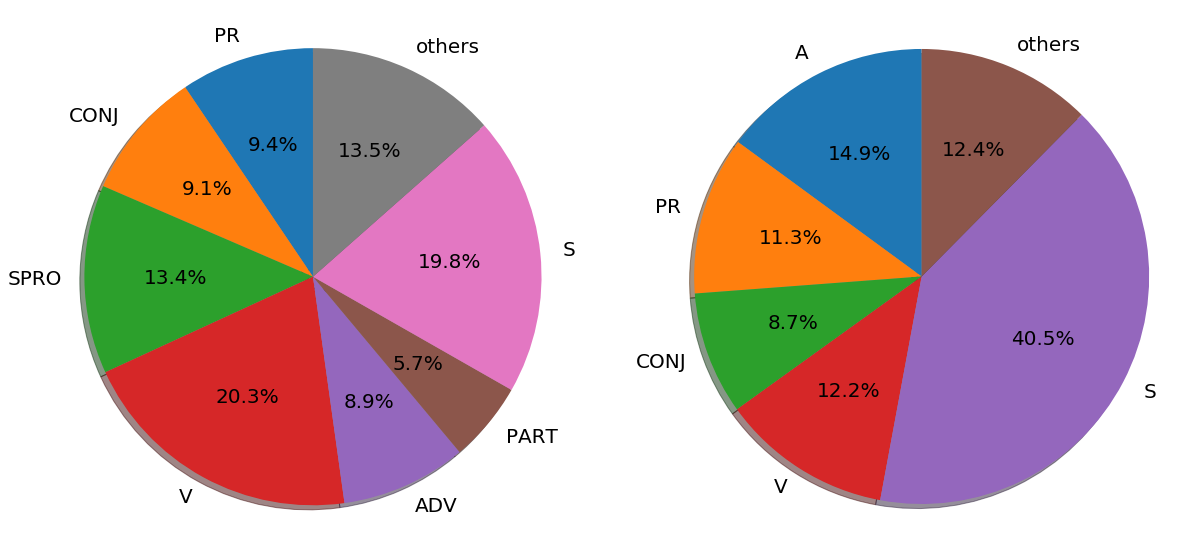

In [21]:
plot_postags_piechart(tokens_lit, tokens_tech)

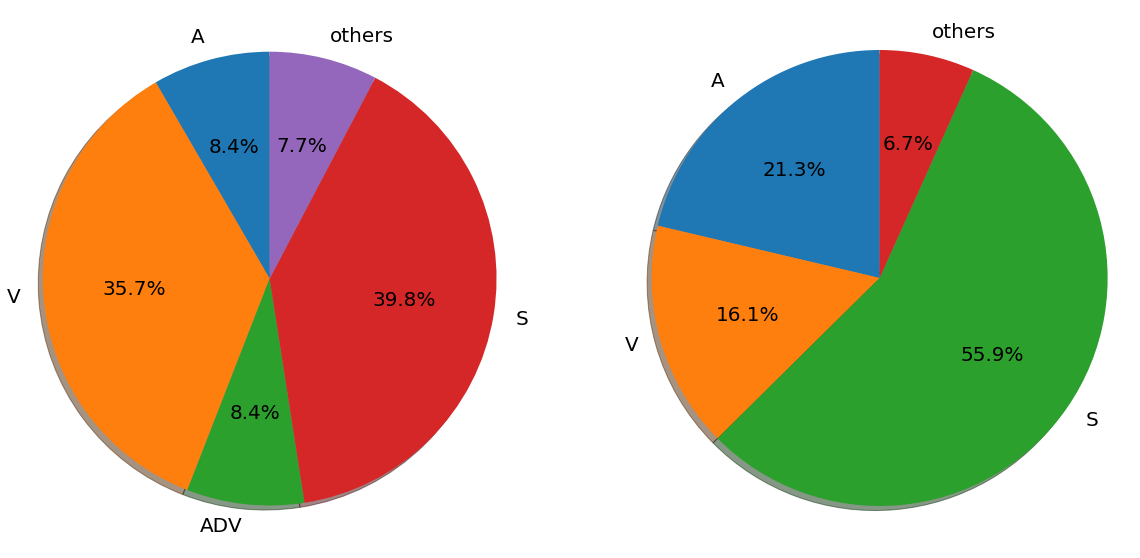

In [22]:
plot_postags_piechart(tokens_lit, tokens_tech, without_stopwords=True)

In [23]:
def get_only_grs(tokens):
    _grs = [re.split(r'[,|=()]', t['analysis'][0]['gr'])
        for t in tokens if 'analysis' in t and t['analysis']]
    for i, gr in enumerate(_grs):
        _grs[i] = [g for g in gr if g]
    return _grs

def count_gr_freq(grs, pos, values):
    _found = []
    for v in values:
        _found.extend([v for g in grs if pos in g and v in g])
    _fdist = nltk.FreqDist(_found)
    return _fdist.most_common(), _found

def words_morph_data_analysis(tokens):
    _time = {'title': 'время', 'values': ['наст', 'непрош', 'прош']}
    _padeji = {'title': 'падежи', 'values': ['им', 'род', 'дат', 'вин', 'твор', 'пр', 'парт', 'местн', 'зват']}
    _number = {'title': 'число', 'values': ['ед', 'мн']}
    _verb_mood = {'title': 'наклонение глагола', 'values': ['деепр', 'инф', 'прич', 'изъяв', 'пов']}
    _adj_form = {'title': 'форма прилагательных', 'values': ['кр', 'полн', 'притяж']}
    _comp_deg = {'title': 'степень сравнения', 'values': ['прев', 'срав']}
    _verb_pers = {'title': 'лицо глагола', 'values': ['1-л', '2-л', '3-л']}
    _gender = {'title': 'род', 'values': ['муж', 'жен', 'сред']}
    _verb_type = {'title': 'вид', 'values': ['несов', 'сов']}
    _anim = {'title': 'одушевленность', 'values': ['од', 'неод']}
    _grs = get_only_grs(tokens)
    _pos_gr = {
        'S': [_padeji,],
        'A': [_padeji,],
        'V': [_time, _verb_pers, _number],
    }
    _pos_names = {
        'S': 'Существительное',
        'A': 'Прилагательное',
        'V': 'Глагол'
    }
    print('Частоты морфологических характеристик основных частей речи\n')
    for k, v in _pos_gr.items():
        for c in v:
            _freqs, _found = count_gr_freq(_grs, k, c['values'])
            print(f"{_pos_names[k]} - {c['title']}")
            print('\n'.join([f"{f[0]}:\t{f[1]}\t{f[1] / len(_found):.4f}" for f in _freqs]))
            print('\n')

In [24]:
words_morph_data_analysis(tokens_lit)

Частоты морфологических характеристик основных частей речи

Существительное - падежи
им:	189	0.3462
вин:	143	0.2619
род:	91	0.1667
пр:	44	0.0806
дат:	40	0.0733
твор:	29	0.0531
местн:	7	0.0128
парт:	3	0.0055


Прилагательное - падежи
им:	38	0.3167
вин:	29	0.2417
род:	14	0.1167
пр:	14	0.1167
твор:	13	0.1083
дат:	12	0.1000


Глагол - время
прош:	171	0.6310
непрош:	100	0.3690


Глагол - лицо глагола
3-л:	46	0.4742
1-л:	30	0.3093
2-л:	21	0.2165


Глагол - число
ед:	229	0.8513
мн:	40	0.1487




In [25]:
words_morph_data_analysis(tokens_tech)

Частоты морфологических характеристик основных частей речи

Существительное - падежи
им:	479	0.2900
вин:	453	0.2742
род:	373	0.2258
пр:	146	0.0884
дат:	111	0.0672
твор:	90	0.0545


Прилагательное - падежи
вин:	196	0.3172
род:	119	0.1926
им:	105	0.1699
пр:	89	0.1440
твор:	56	0.0906
дат:	53	0.0858


Глагол - время
непрош:	138	0.7419
прош:	43	0.2312
наст:	5	0.0269


Глагол - лицо глагола
3-л:	107	0.8492
2-л:	13	0.1032
1-л:	6	0.0476


Глагол - число
ед:	143	0.7772
мн:	41	0.2228




In [26]:
def get_unique_lexes(tokens):
    return set(t['analysis'][0]['lex'].lower() for t in tokens if 'analysis' in t and t['analysis'])

def get_unique_lexes_by_pos(tokens, pos):
    return set(t['analysis'][0]['lex'].lower() 
        for t in tokens if 'analysis' in t and t['analysis'] and pos in t['analysis'][0]['gr'])

def get_unknown_words(tokens):
    return [t for t in tokens if 'analysis' in t and t['analysis'] and 'qual' in t['analysis'][0]]

def get_most_freq_words(tokens, pos=None):
    if pos:
        _words = [t['analysis'][0]['lex'] for t in tokens if 'analysis' in t and t['analysis'] and pos in t['analysis'][0]['gr']]
    else:
        _words = [t['analysis'][0]['lex'] for t in tokens if 'analysis' in t and t['analysis']]
    _fdist = nltk.FreqDist(_words)
    return _fdist.most_common(5)

def print_most_freq_words(tokens, pos=None):
    _freqs = get_most_freq_words(tokens, pos)
    print('\n'.join([f"{f[0]}: {f[1]/len(tokens):.4f}" for f in _freqs]))

def word_lex_analysis(tokens, without_stopwords=False):
    _tokens = get_morph_tokens(tokens, without_stopwords)
    _unique_lexes = get_unique_lexes(_tokens)
    _noun_unique_lexes = get_unique_lexes_by_pos(_tokens, 'S')
    _adj_unique_lexes = get_unique_lexes_by_pos(_tokens, 'A')
    _verb_unique_lexes = get_unique_lexes_by_pos(_tokens, 'V')
    _adv_unique_lexes = get_unique_lexes_by_pos(_tokens, 'ADV')
    _unknown_words = get_unknown_words(_tokens)

    print(
        f"Число уникальных лемм: {len(_unique_lexes)}\n"
        f"Число уникальных лемм существительных: {len(_noun_unique_lexes)}\n"
        f"Число уникальных лемм прилагательных: {len(_adj_unique_lexes)}\n"
        f"Число уникальных лемм глаголов: {len(_verb_unique_lexes)}\n"
        f"Число уникальных лемм наречий: {len(_adv_unique_lexes)}\n"
        f"Число незнакомых слов: {len(_unknown_words)}\n"
        f"Коэффициент лексического богатства текста: {len(_unique_lexes) / len(_tokens):.4f}"
    )

    print('\nСамые частотные слова и их частоты:')
    print_most_freq_words(_tokens)
    print('\nСамые частотные существительные и их частоты:')
    print_most_freq_words(_tokens, pos='S')
    print('\nСамые частотные прилагательные и их частоты:')
    print_most_freq_words(_tokens, pos='A')
    print('\nСамые частотные глаголы и их частоты:')
    print_most_freq_words(_tokens, pos='V')
    print('\nСамые частотные наречия и их частоты:')
    print_most_freq_words(_tokens, pos='ADV')

In [27]:
print('Лексические данные литературного текста:\n')
word_lex_analysis(tokens_lit)

Лексические данные литературного текста:

Число уникальных лемм: 623
Число уникальных лемм существительных: 189
Число уникальных лемм прилагательных: 199
Число уникальных лемм глаголов: 294
Число уникальных лемм наречий: 105
Число незнакомых слов: 7
Коэффициент лексического богатства текста: 0.3923

Самые частотные слова и их частоты:
она: 0.0422
и: 0.0390
я: 0.0309
в: 0.0271
не: 0.0208

Самые частотные существительные и их частоты:
она: 0.0422
я: 0.0309
алиса: 0.0195
мышь: 0.0120
вы: 0.0107

Самые частотные прилагательные и их частоты:
не: 0.0208
так: 0.0082
как: 0.0069
такой: 0.0057
теперь: 0.0050

Самые частотные глаголы и их частоты:
быть: 0.0195
так: 0.0082
сказать: 0.0082
как: 0.0069
подумать: 0.0063

Самые частотные наречия и их частоты:
так: 0.0082
как: 0.0069
теперь: 0.0050
совсем: 0.0044
тут: 0.0044


In [28]:
print('Лексические данные научного текста:\n')
word_lex_analysis(tokens_tech)

Лексические данные научного текста:

Число уникальных лемм: 700
Число уникальных лемм существительных: 321
Число уникальных лемм прилагательных: 221
Число уникальных лемм глаголов: 181
Число уникальных лемм наречий: 53
Число незнакомых слов: 45
Коэффициент лексического богатства текста: 0.3682

Самые частотные слова и их частоты:
и: 0.0500
в: 0.0379
слово: 0.0268
на: 0.0189
текст: 0.0163

Самые частотные существительные и их частоты:
слово: 0.0268
текст: 0.0163
образ: 0.0100
средство: 0.0079
значение: 0.0074

Самые частотные прилагательные и их частоты:
который: 0.0100
не: 0.0053
так: 0.0053
языковой: 0.0047
лексический: 0.0047

Самые частотные глаголы и их частоты:
представлять: 0.0100
быть: 0.0063
так: 0.0053
необходимо: 0.0037
непосредственно: 0.0032

Самые частотные наречия и их частоты:
так: 0.0053
необходимо: 0.0037
непосредственно: 0.0032
например: 0.0026
можно: 0.0021


In [29]:
print('Лексические данные литературного текста без стоп-слов:\n')
word_lex_analysis(tokens_lit, without_stopwords=True)

Лексические данные литературного текста без стоп-слов:

Число уникальных лемм: 493
Число уникальных лемм существительных: 172
Число уникальных лемм прилагательных: 123
Число уникальных лемм глаголов: 243
Число уникальных лемм наречий: 57
Число незнакомых слов: 7
Коэффициент лексического богатства текста: 0.6547

Самые частотные слова и их частоты:
алиса: 0.0412
мышь: 0.0252
подумать: 0.0120
кошка: 0.0093
прощать: 0.0066

Самые частотные существительные и их частоты:
алиса: 0.0412
мышь: 0.0252
кошка: 0.0093
нога: 0.0066
веер: 0.0066

Самые частотные прилагательные и их частоты:
бедный: 0.0066
всякий: 0.0066
милый: 0.0053
странный: 0.0040
один: 0.0040

Самые частотные глаголы и их частоты:
подумать: 0.0120
прощать: 0.0066
становиться: 0.0066
понимать: 0.0066
приходиться: 0.0053

Самые частотные наречия и их частоты:
вскоре: 0.0040
четырежды: 0.0040
страно: 0.0027
стремительно: 0.0027
прочь: 0.0027


In [30]:
print('Лексические данные научного текста без стоп-слов:\n')
word_lex_analysis(tokens_tech, without_stopwords=True)

Лексические данные научного текста без стоп-слов:

Число уникальных лемм: 622
Число уникальных лемм существительных: 303
Число уникальных лемм прилагательных: 188
Число уникальных лемм глаголов: 158
Число уникальных лемм наречий: 34
Число незнакомых слов: 45
Коэффициент лексического богатства текста: 0.4701

Самые частотные слова и их частоты:
слово: 0.0340
текст: 0.0234
образ: 0.0144
представлять: 0.0144
средство: 0.0113

Самые частотные существительные и их частоты:
слово: 0.0340
текст: 0.0234
образ: 0.0144
средство: 0.0113
значение: 0.0106

Самые частотные прилагательные и их частоты:
языковой: 0.0068
лексический: 0.0068
конкретный: 0.0060
визуальный: 0.0060
массовый: 0.0053

Самые частотные глаголы и их частоты:
представлять: 0.0144
необходимо: 0.0053
непосредственно: 0.0045
являться: 0.0038
происходить: 0.0038

Самые частотные наречия и их частоты:
необходимо: 0.0053
непосредственно: 0.0045
например: 0.0038
правильно: 0.0023
соответственно: 0.0023


Распределение 20 самых частотных слов литературного текста



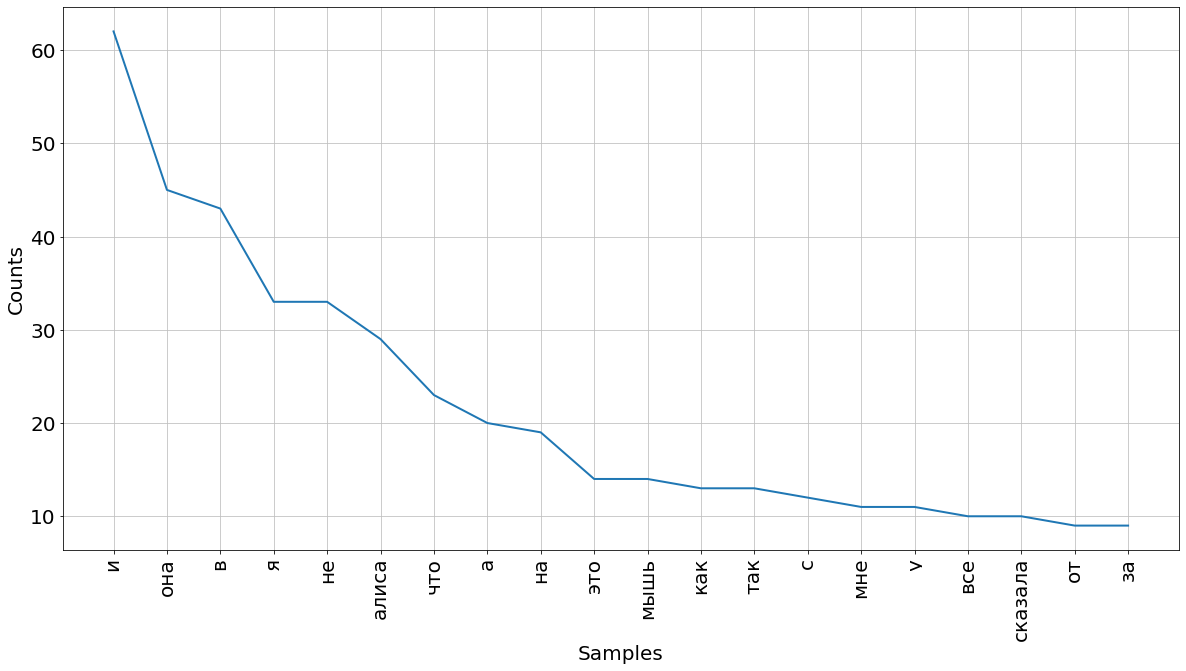

In [31]:
print('Распределение 20 самых частотных слов литературного текста\n')
plot_most_freq_words(tokens_lit)

Распределение 20 самых частотных слов научного текста



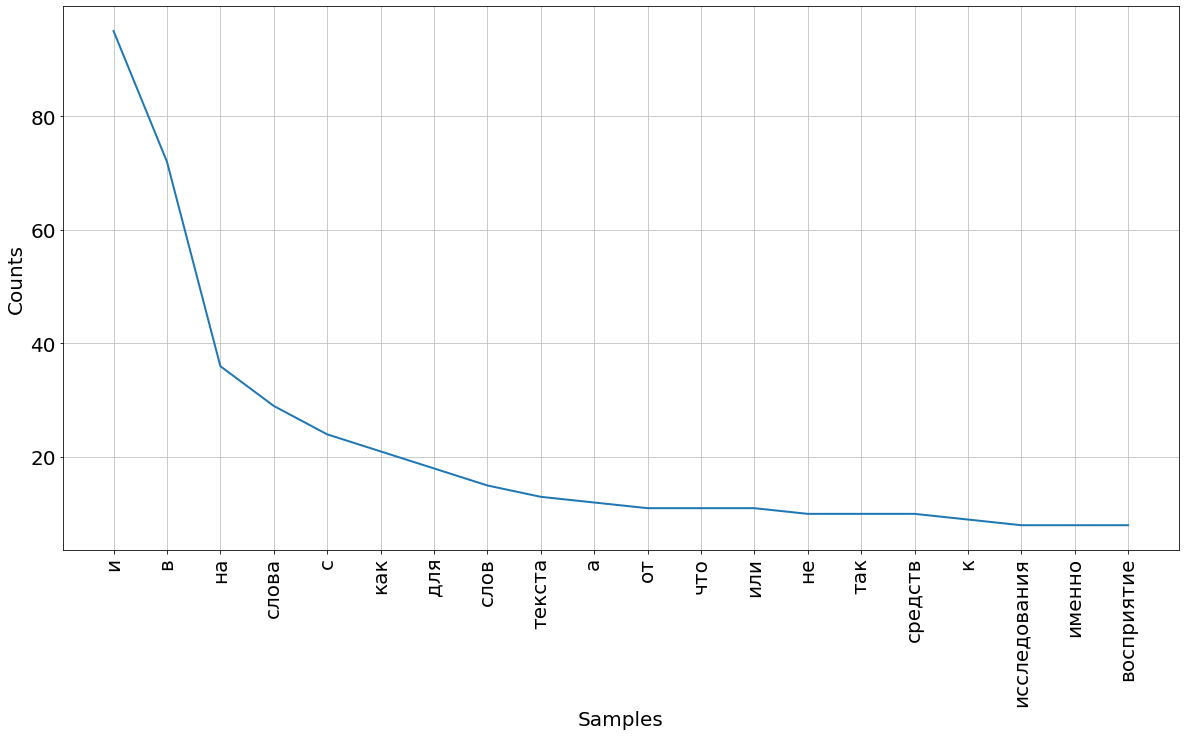

In [32]:
print('Распределение 20 самых частотных слов научного текста\n')
plot_most_freq_words(tokens_tech)

Распределение 20 самых частотных слов литературного текста без стоп-слов



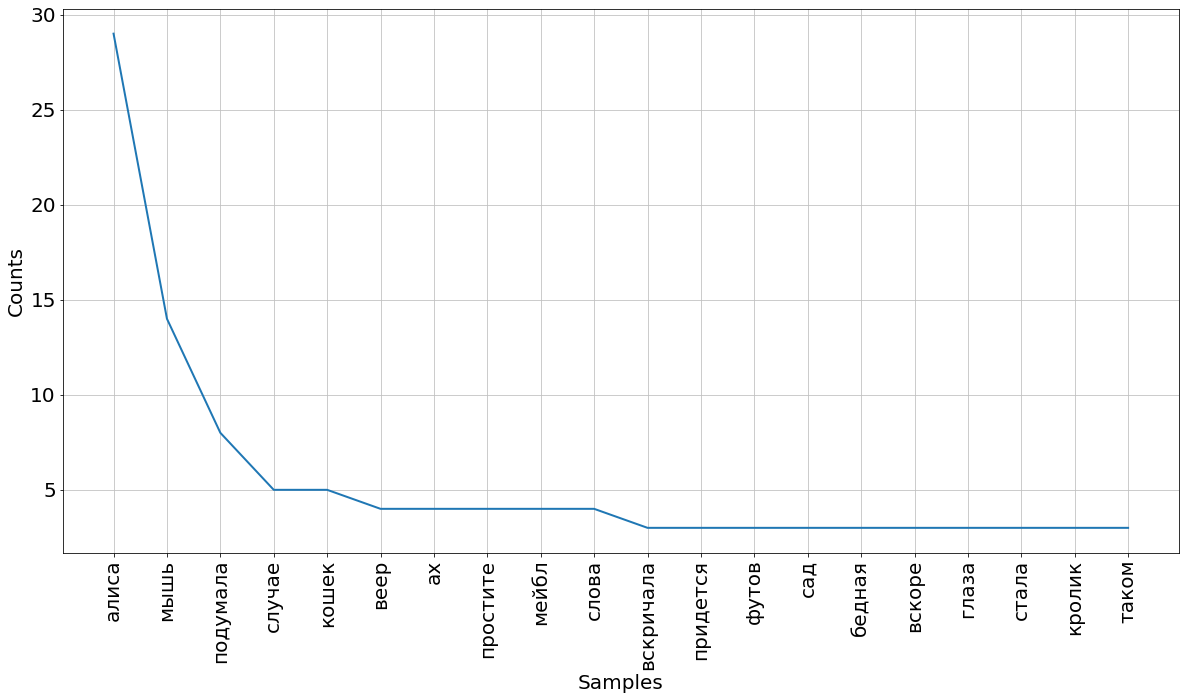

In [33]:
print('Распределение 20 самых частотных слов литературного текста без стоп-слов\n')
plot_most_freq_words(tokens_lit, without_stopwords=True)

Распределение 20 самых частотных слов научного текста без стоп-слов



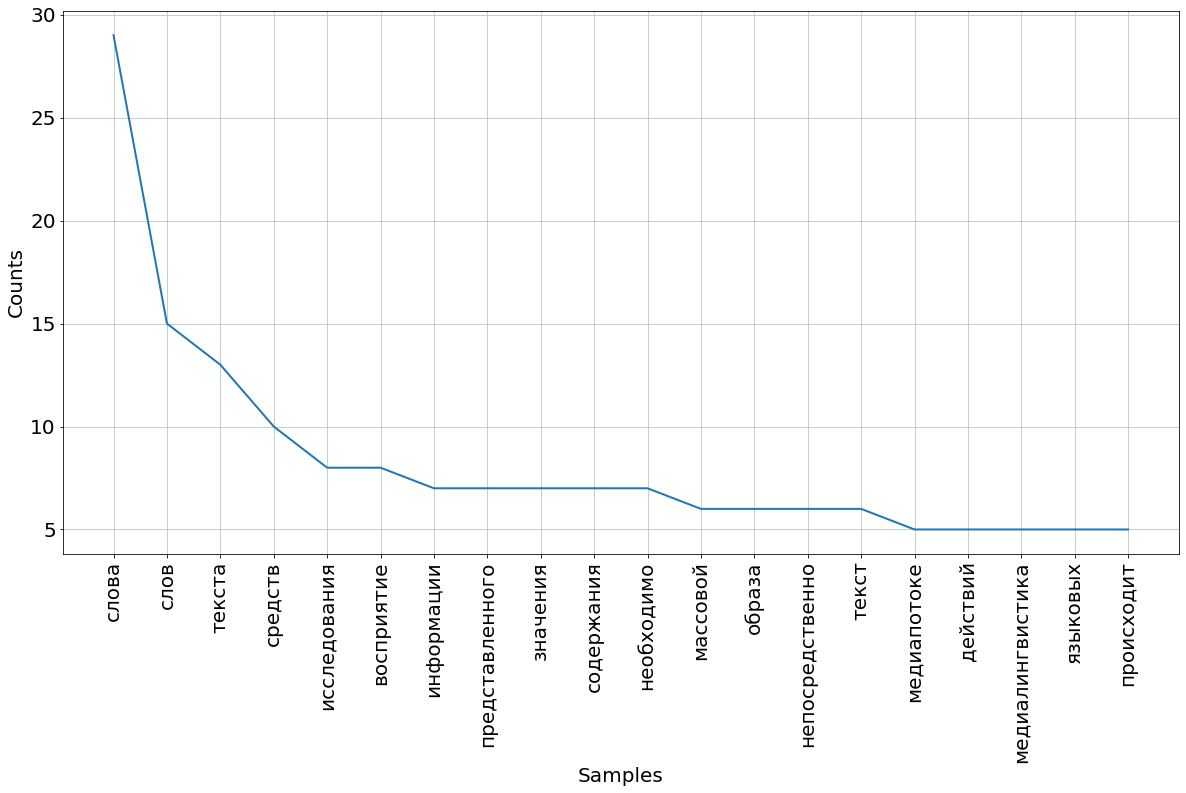

In [34]:
print('Распределение 20 самых частотных слов научного текста без стоп-слов\n')
plot_most_freq_words(tokens_tech, without_stopwords=True)